# **EXERCÍCIO: ÁRVORE DE DECISÃO**

---
---


Neste exerício, iremos demonstra nosso conhecimento inicial com *Machine Learning*, bem como a nossa manualidade lidando com árvore de decisão.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Estamo utilizando uma base de dados de uma agência de crédito o qual sua variável *default* é se o cliente é bom ou mau pagador. Essa base já foi previamente tratada, com suas variáveis categóricas estando no formato *flag* ou *dummie*, e separada em dois csv, um com suas as variáveis explicativas, para utilizarmos no treinamento, e o outro com a nossa variável *target*, para usar de validação de dados.

Essa base de dados pode ser encontrada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

Para as variáveis explicativas estamos salvando como x e a target estamos salvando como y.

In [43]:
x = pd.read_csv('base_treinamento.csv')
y = pd.read_csv('target.csv')
#Fiz isso pois ao tranformar em csv criaou-se uma coluna para os índices
y = y['mau']



## **1.Carregue a base e garanta que a base está como deveria.**

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

*Para fazermos a separação dos nossos dataset para treino e teste, iremos utilizar o método `train_test_split` do sklearn, onde iremos passar essas bsae como parâmetro, e também a porcentagem que queremos para o teste.*

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### 2.1.Defina um objeto com a função da árvore de decisão.

*Para isso, utilizamos o método `DecisionTreeClassifier` do sklearn, que cria um objeto do tipo árvore de decisão.*

In [58]:
clf = DecisionTreeClassifier(random_state=100)

### 2.2. Treine o modelo com os dados de treinamento.

*Utilizamos o método `fit` do sklearn que o método de trainamento. Onde, passamos nos parâmetros nossas variáveis explicativas e a nossa variável target.*

In [59]:
clf = clf.fit(x_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

### 2.3.Visualize a ávore.

*Para plotarmos um objeto do tipo árvore de decisão precisamos do método `plot_tree` do sklearn. Onde, um dos parâmetros, o `class_name`, passamos o que significa o 0 e 1, respectivamente, da nossa variável default, que no caso é "bom" e "mau" pagador.*

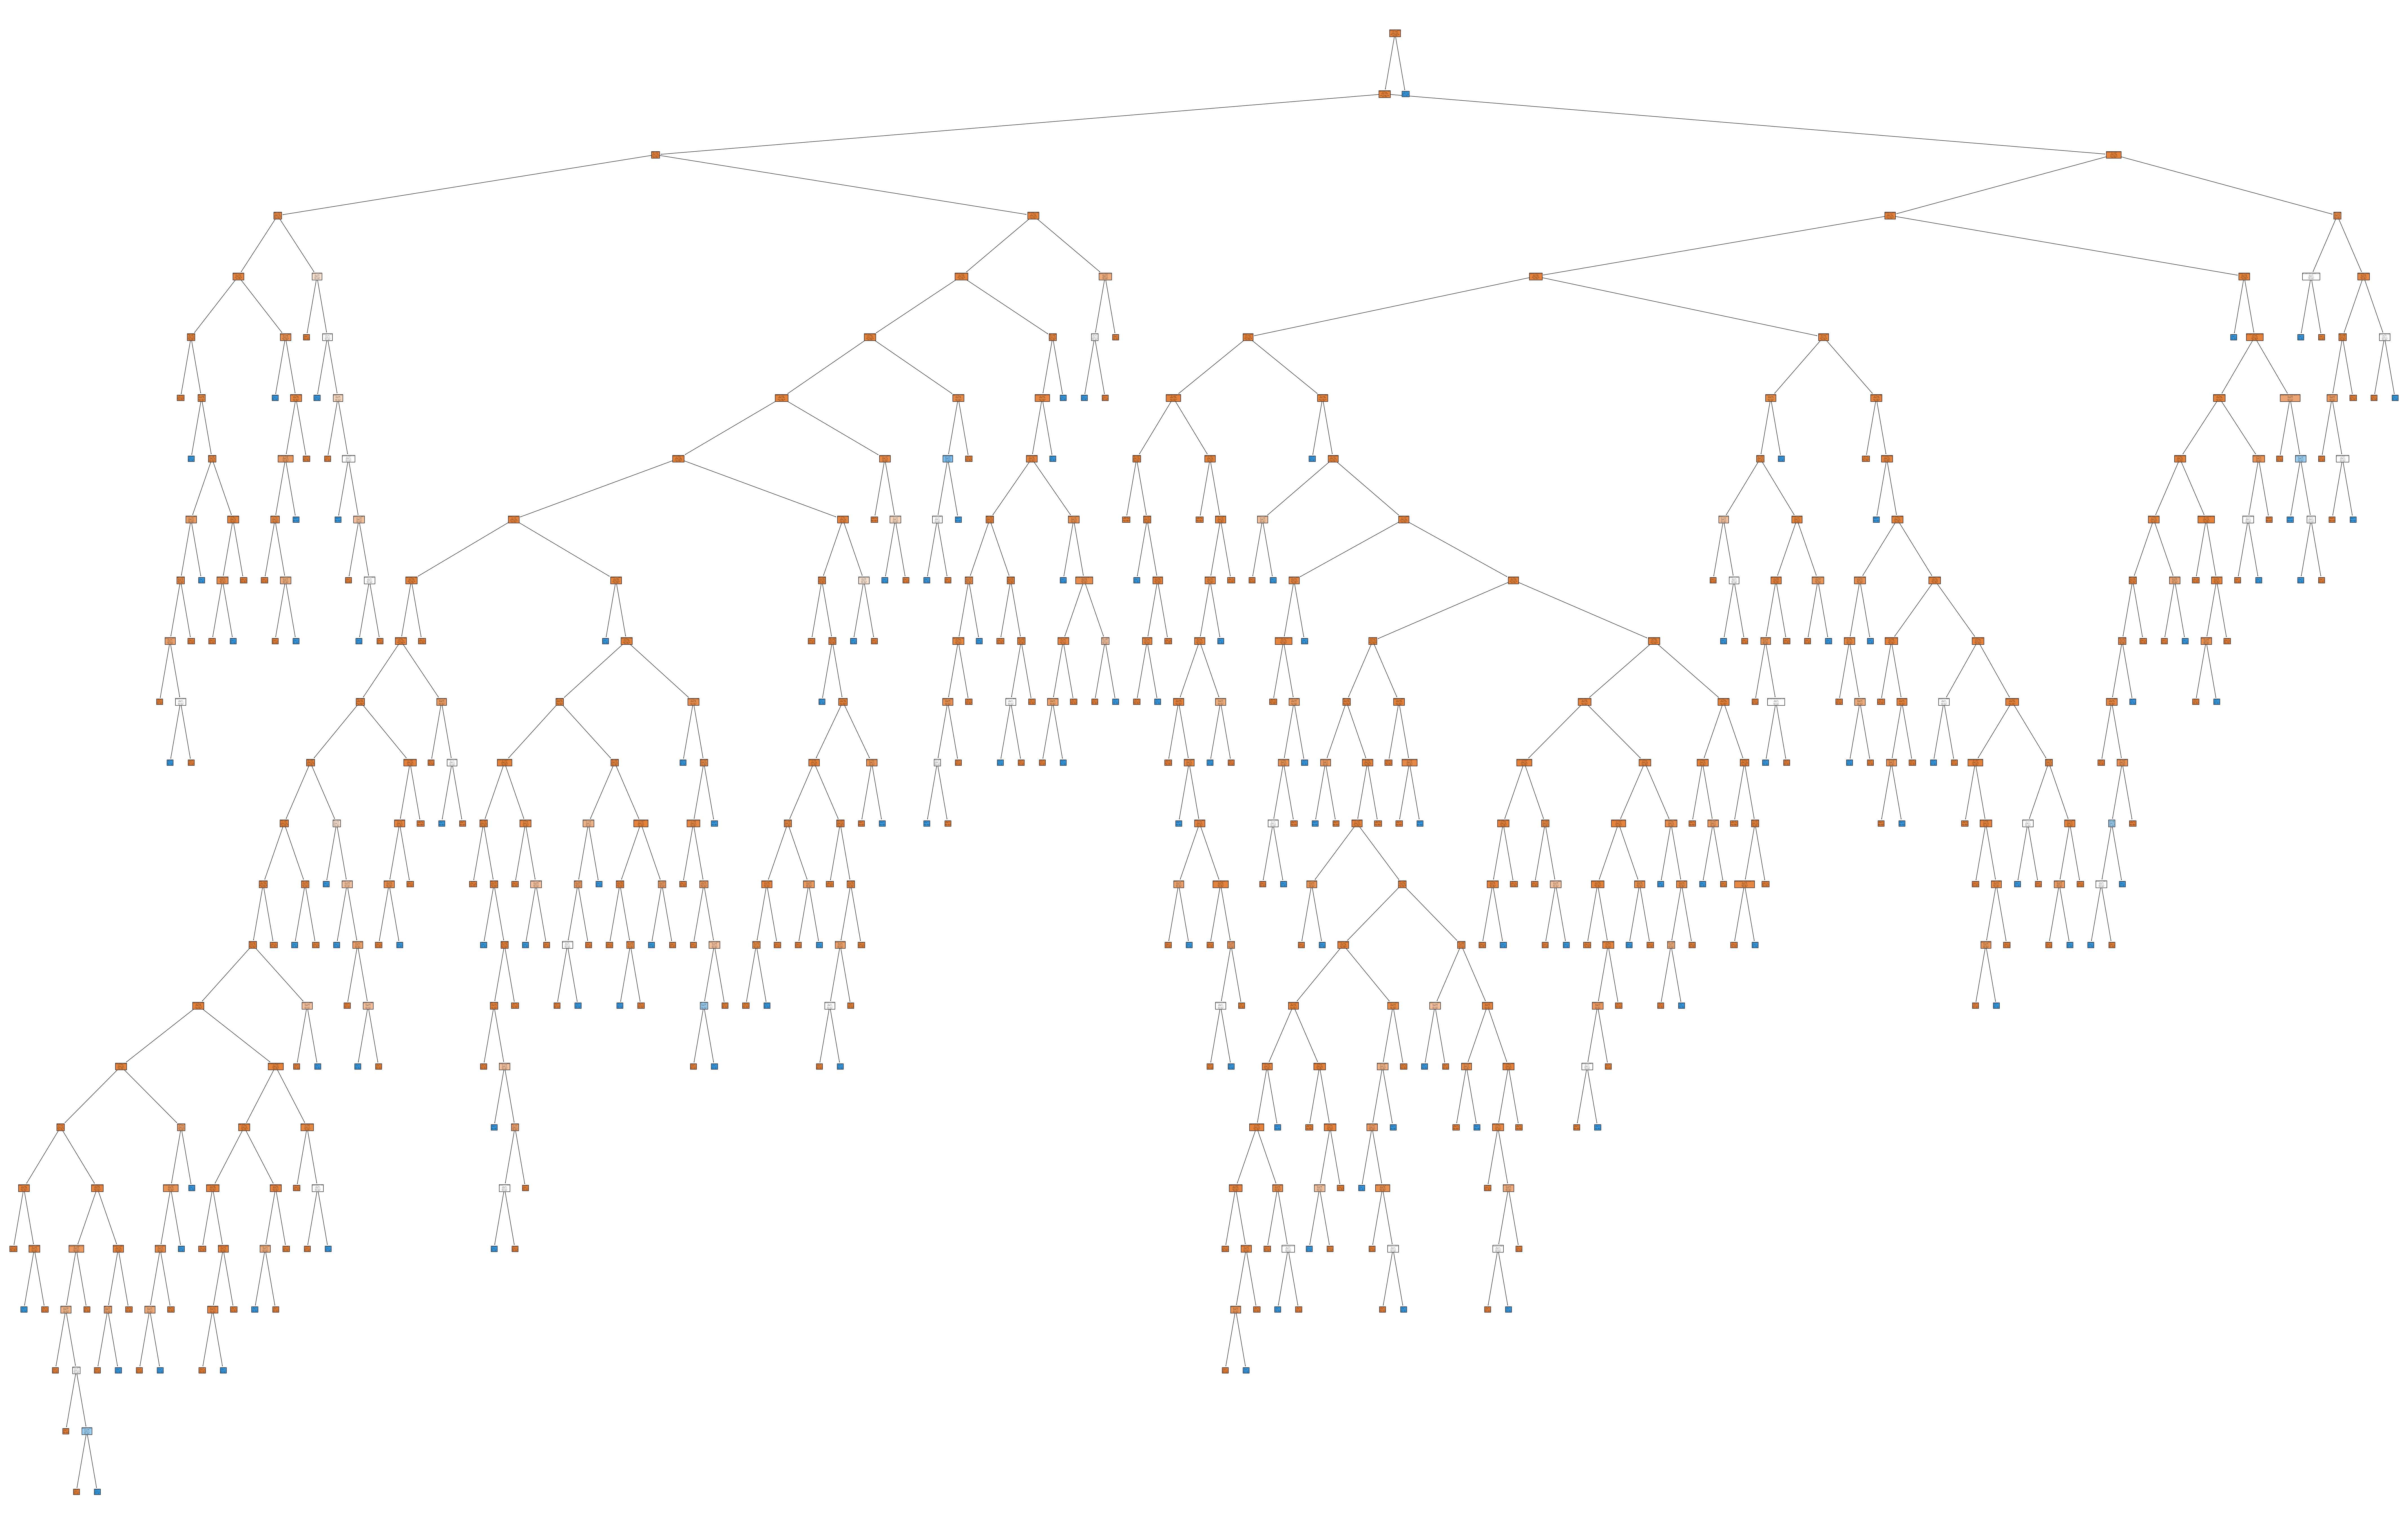

In [48]:
#Tamanho da Figura
plt.figure(figsize=(110, 70))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          #Qaundo formos passar as features temos que passar as colunas em forma de lista
          feature_names=list(x_train.columns));

### 2.4.Produza uma visuzalização da matriz confusão.

*Antes de tudo iremos criar uma variável que irá guardar os valores do modelo no próprio dataset que foi usado para o treinamento. Fazemos isso com o método `predict`.*

In [60]:
predicts = clf.predict(x_train)

*Depois, iremos criar um objeto do tipo matrix confusão, que irá receber os valores da nossa variável target de treinamento e esses valores que o novo modelo se auto-avaliou.*

In [61]:
cm = confusion_matrix(y_train, predicts, labels=clf.classes_)

*E, para plotar essa matriz, utilizamos o método `ConfusionMatrixDisplay`, e passamos as labels aprovados e reprovados, que se referem ao status que aquela requisição de crédito deve ter.*



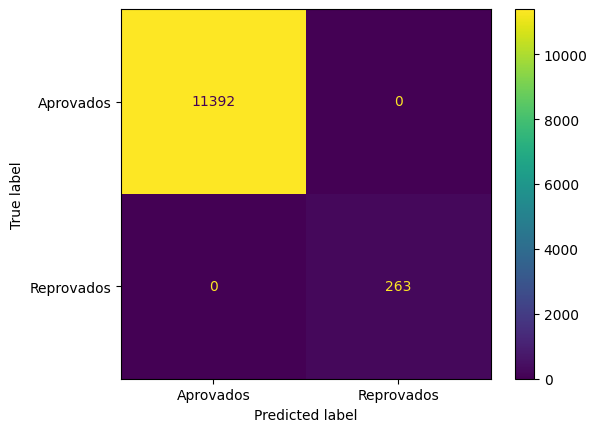

In [62]:
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

*Para calcular a acurácia, utilizamos o método accuracy_score*

In [54]:
accuracy_score(y_train, predicts)

1.0

E aí obtemos a acurácia de 100%, o que indica fortemente que o nosso modelo está *overfittado*.

### 3.1.Classifique a base de teste de acordo com a árvore do exercício anterior.

In [63]:
cm = confusion_matrix(y_test, clf.predict(x_test), labels=clf.classes_)

### 3.2.Produza a visualização da matrix confusão da base de teste.

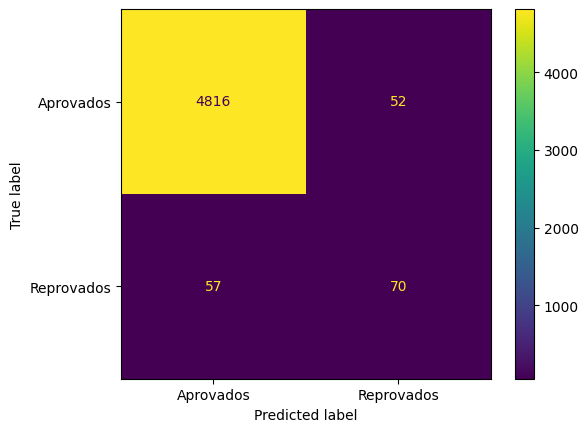

In [64]:
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

### 3.3.Calcule a acurácia da matrix confusão da base de teste.

In [65]:
accuracy_score(y_test, clf.predict(x_test))

0.9781781781781782

Temos uma acurácia de 97%. Diminiu 3% e continua com uma ótima taxa de acurácia. Portanto, nosso modelo não está overfittado.

### 3.4.Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

In [72]:
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

In [73]:
clf = clf.fit(x_train, y_train)

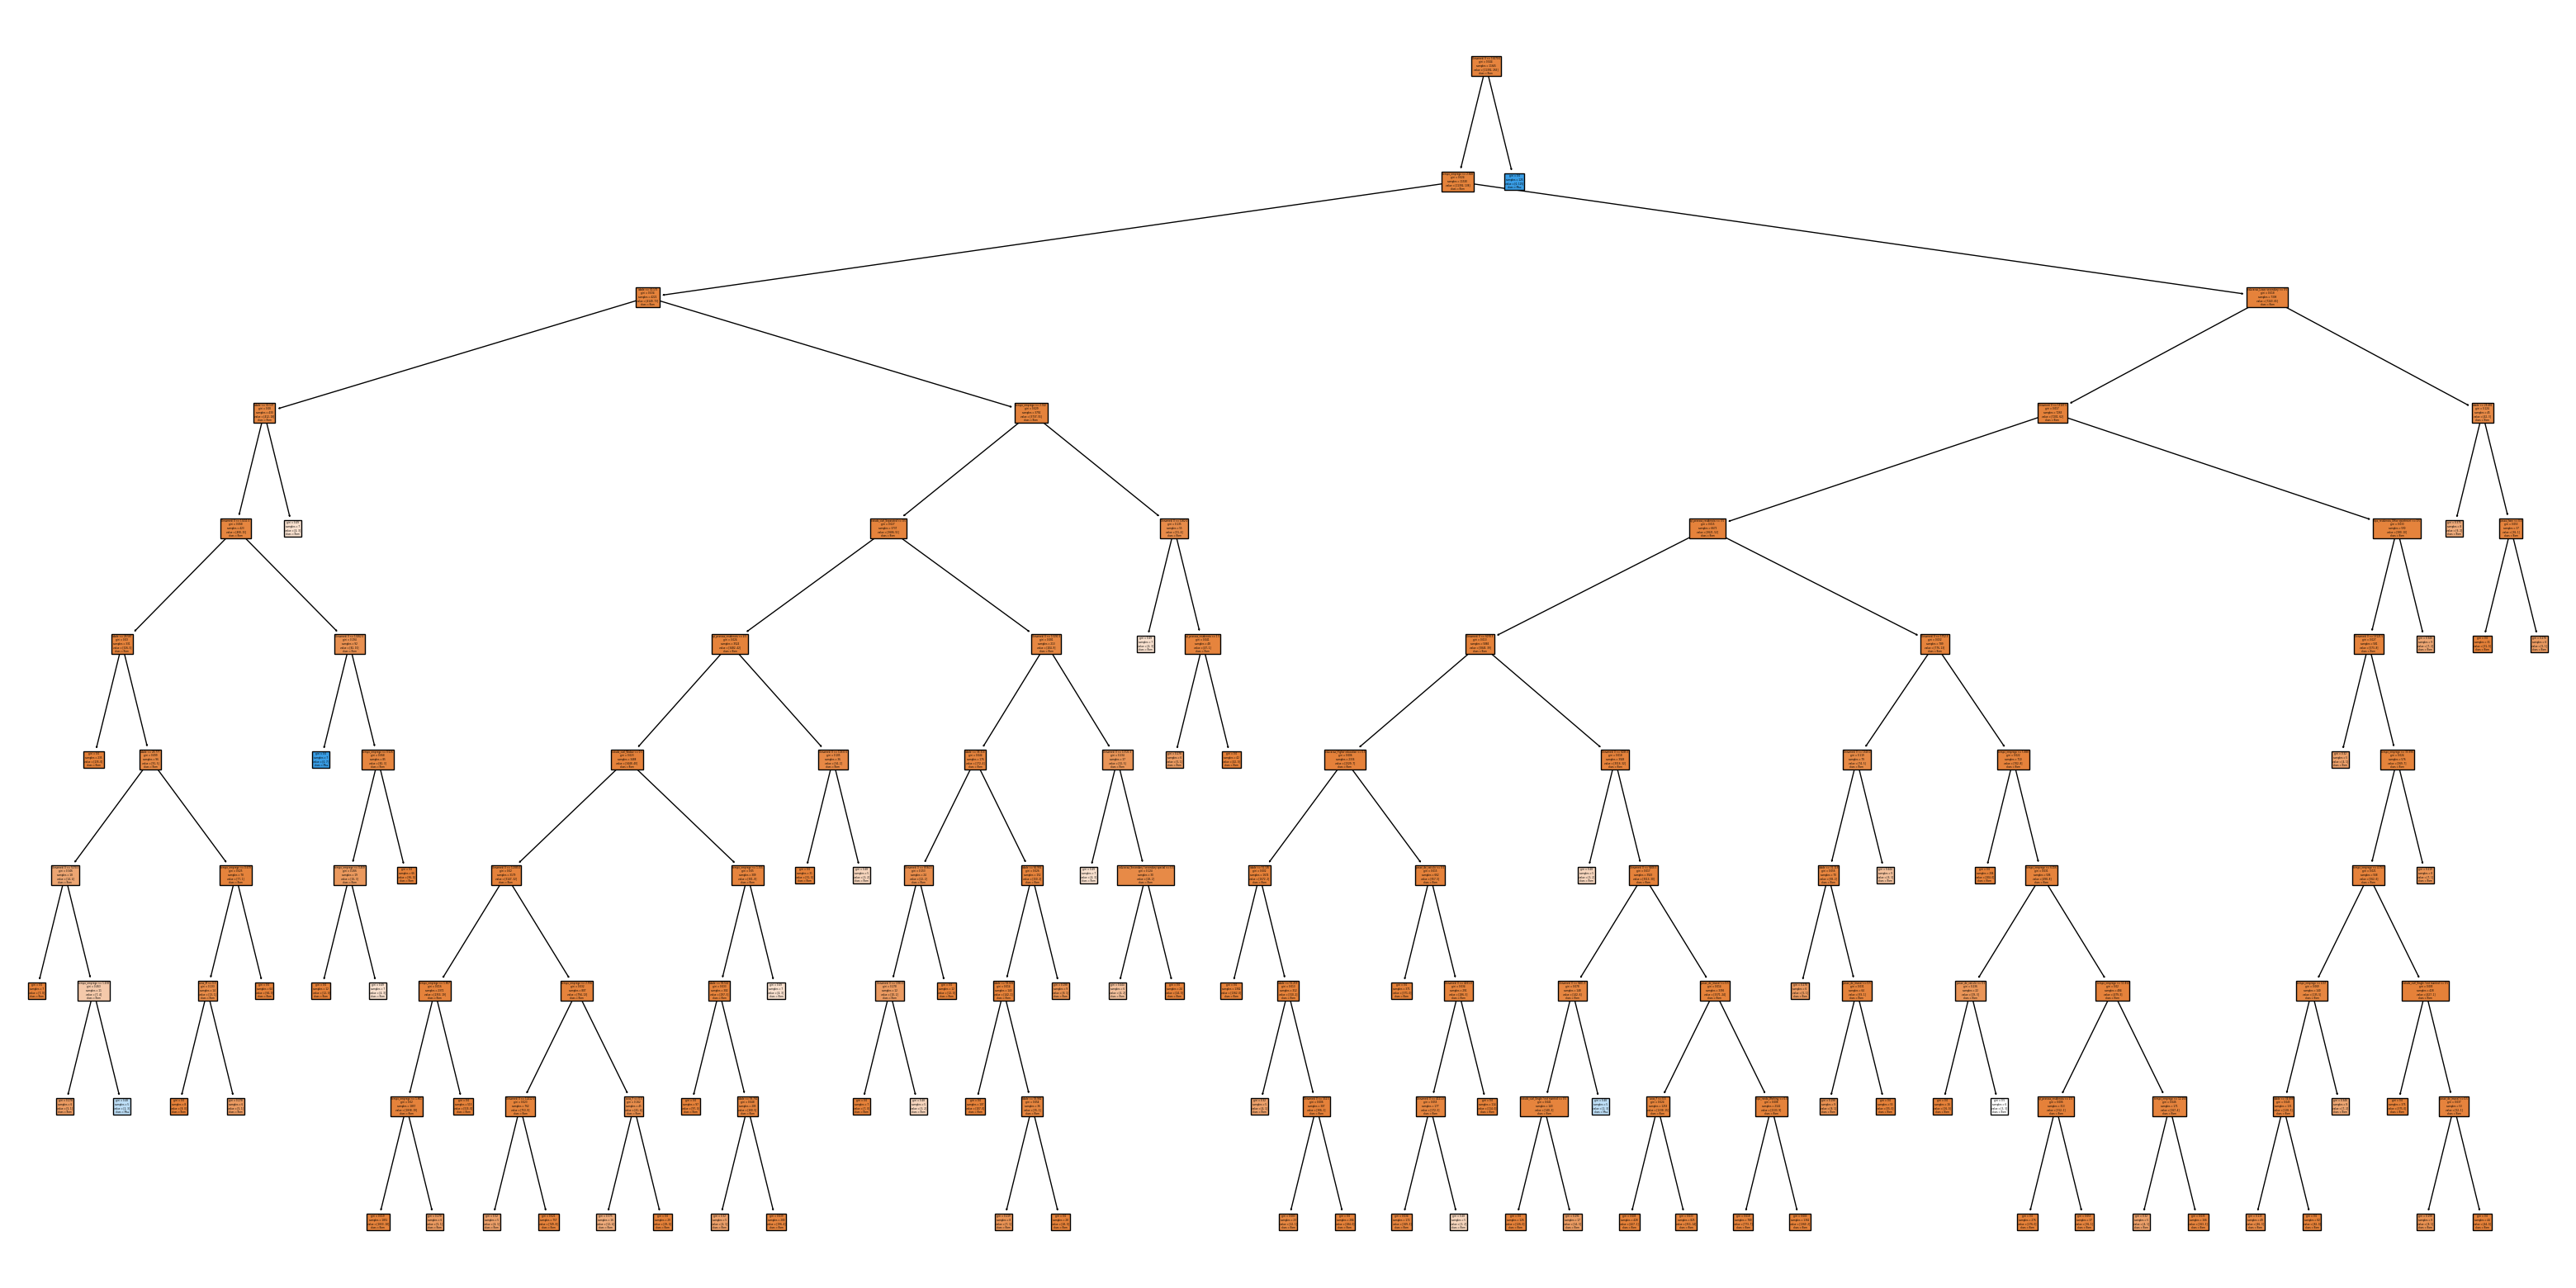

In [74]:
#Tamanho da Figura
plt.figure(figsize=(40, 20))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          #Qaundo formos passar as features temos que passar as colunas em forma de lista
          feature_names=list(x_train.columns));

In [75]:
cm = confusion_matrix(y_train, clf.predict(x_train), labels=clf.classes_)

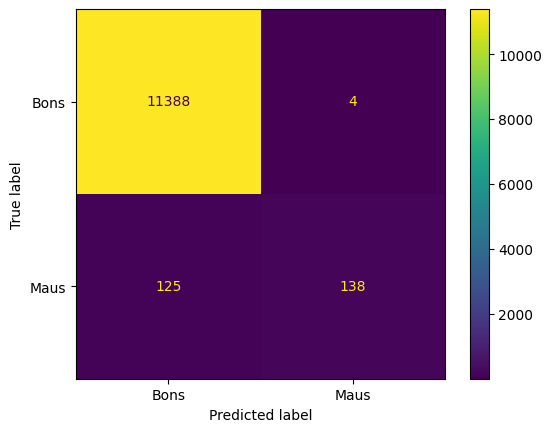

In [76]:
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bons', 'Maus'])

MatrizDeConfusao.plot()

In [78]:
print(f'Propoção de maus pagadores que o modelo sem podas na árvore classificou: {263/11392*100}%')

Propoção de maus pagadores da primeira matrix confusão: 2.308637640449438%


In [80]:
print(f'Propoção de maus pagadores que o modelo com a ávore podada classificou: {(138+4)/(125+11388)*100}%')

Propoção de maus pagadores que o modelo com a ávore podada classificou: 1.2333883436115696%


In [81]:
print(f'Acurácia do método: {accuracy_score(y_train, clf.predict(x_train))}')

Acurácia do método: 0.9889317889317889


Podemos ver que, embora a acurácia tenha diminuído 2% apenas, a proporção de maus pagadores : bons pagadores que o modelo classificou caiu pela a metade.

### 3.5.Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [93]:
#Deixando todo mundo como bom pagador

y_train.loc[:] = 0

In [95]:
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

clf = clf.fit(x_train, y_train)

cm = confusion_matrix(y_train, clf.predict(x_train), labels=clf.classes_)

In [97]:
accuracy_score(y_train, clf.predict(x_train))

1.0

A acurácia ficaria como 100%